In [1]:
# go back to old data for pacbio and original designed dms variants

In [1]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make barplot of PKR variants present in PacBio reads, 220823MC
input_file = '../data/pacbio_211209/pkr/output/variants/pkr.codon_variant_table.csv'
#design_input = '../data/dms_variants_210303/pkr_designed_set.pkl'
protein = 'PKR'

win1 = [255,278]
win2 = [371,385]
win3 = [448,455]
win4 = [480,506]
pkr_win = {'win_1':win1, 'win_2':win2, 'win_3':win3, 'win_4':win4}
pkr_aa_pos = list(itertools.chain.from_iterable([list(range(val[0], val[1]+1)) for val in pkr_win.values()]))

# get pacbio set
df = pd.read_csv(input_file)

#pacbio_set = set(df.query('n_aa_substitutions == 1')['aa_substitutions'].unique())
#len(design_set.difference(pacbio_set))

In [2]:
var_df = df.groupby('aa_substitutions')['n_aa_substitutions'].mean().reset_index()

In [3]:
def variant_category(row):
    var = row['aa_substitutions']
    n_var = row['n_aa_substitutions']
    if var in design_set:
        return 'Designed Variant'
    elif n_var > 1:
        return f'{int(n_var)} Variants'
    else:
        return 'Unintended Variant'
var_df['Variant Category'] = var_df.apply(lambda x: variant_category(x), axis=1)

NameError: name 'design_set' is not defined

In [ ]:
# plot count of variant categories
sns.countplot(data=var_df, x='Variant Category')

In [ ]:
df

<Axes: ylabel='Frequency'>

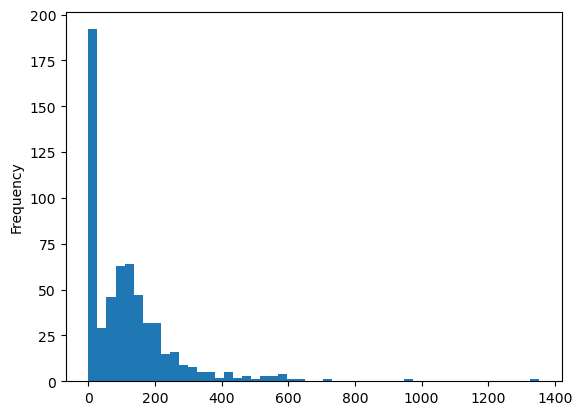

In [4]:
df.query('n_aa_substitutions == 1').groupby('aa_substitutions')['barcode'].nunique().plot.hist(bins=50)

<Axes: ylabel='Frequency'>

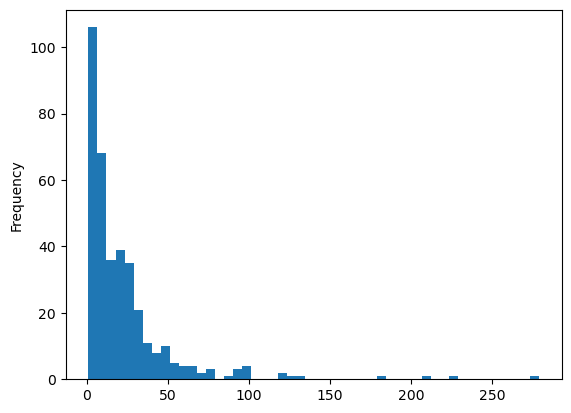

In [5]:
df.query('n_aa_substitutions == 1 and variant_call_support > 5').groupby('aa_substitutions')['barcode'].nunique().plot.hist(bins=50)

In [27]:
df['designed_variant'] = df['aa_substitutions'].isin(design_set)

In [6]:
# PKR barcodes per variant
print('Mean barcodes per variant:', df.query('designed_variant').groupby('aa_substitutions')['barcode'].nunique().mean())

ax = df.query('designed_variant').groupby('aa_substitutions')['barcode'].nunique().plot.hist(bins=20, color='#6dc091')
ax.set_xlabel('Number of Unique Barcodes per Designed PKR Variant')
ax.set_ylabel('Count')
fig = ax.get_figure()

img_path = f'../img/pacbio_{protein}-barcodes/{protein}_barcodes-per-variant'
#fig.savefig(f'{img_path}.png')
#fig.savefig(f'{img_path}.svg')
print('Saved image to:', img_path)

UndefinedVariableError: name 'designed_variant' is not defined

In [7]:
# pkr reads per barcode
print('Mean reads per barcode:', df.query('designed_variant')['variant_call_support'].mean())
ax = df.query('designed_variant')['variant_call_support'].plot.hist(bins=20, color='#6dc091')
ax.set_xlabel('Number of Reads per PKR Barcode')
ax.set_ylabel('Count')
fig = ax.get_figure()

img_path = f'../img/pacbio_{protein}-barcodes/{protein}_reads-per-barcode'
#fig.savefig(f'{img_path}.png')
#fig.savefig(f'{img_path}.svg')
print('Saved image to:', img_path)

UndefinedVariableError: name 'designed_variant' is not defined

In [28]:
# make donut plots of PacBio barcode and read distribution for PKR variants, 220823MC
# output/variants/pkr.codon_variant_table.csv'
protein = 'K3L'
input_file = f'../data/pacbio_220823/{protein}/output/variants/{protein}.codon_variant_table.csv'
design_input = f'../data/dms_variants_220426/output/{protein}-designed-variants_set.pkl'
intended_aa_pos = list(range(2,89)) # intended variant region

# get designed set
with open(design_input, 'rb') as f:
    design_set = pickle.load(f)
len(design_set)

# get pacbio set
df = pd.read_csv(input_file)

pacbio_set = set(df.query('n_aa_substitutions == 1')['aa_substitutions'].unique())
missing_k3l = list(design_set.difference(pacbio_set))

# positions where k3l variant is missing, L2V mutation WT and Vector
set([int(i[1:-1]) for i in missing_k3l])

# missing k3l variants
missing_k3l

# most of the 2 variants for K3L contain L2V
df['L2V_bool'] = df['aa_substitutions'].str.contains('L2V')
df.query('n_aa_substitutions == 2')['L2V_bool'].value_counts()

df['designed_variant'] = (((df.n_aa_substitutions == 2) & (df.L2V_bool == True)) | df['aa_substitutions'].isin(design_set))
df['strict_designed_variant'] = df['aa_substitutions'].isin(design_set)

# correction for the L2V mistake in windows 1-2
df['infered_aa_substitutions'] = df.query('designed_variant')['aa_substitutions'].str.split(' ').str[-1]

Mean barcodes per variant: 62.82026768642447
Saved image to: ../img/pacbio_K3L-barcodes/K3L_barcodes-per-variant


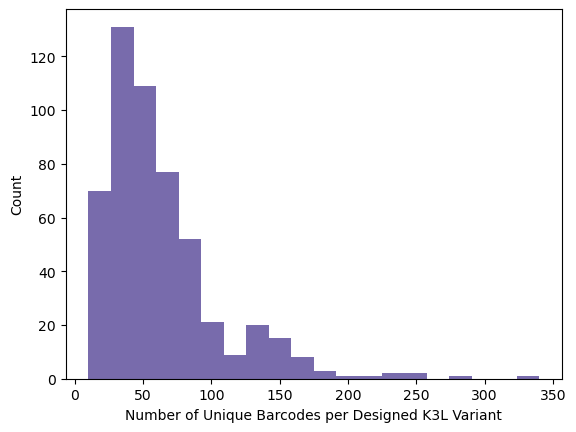

In [11]:
# K3L barcodes per variant
print('Mean barcodes per variant:', df.query('designed_variant').groupby('infered_aa_substitutions')['barcode'].nunique().mean())

ax = df.query('designed_variant').groupby('infered_aa_substitutions')['barcode'].nunique().plot.hist(bins=20, color='#786bac')
ax.set_xlabel(f'Number of Unique Barcodes per Designed {protein} Variant')
ax.set_ylabel('Count')
fig = ax.get_figure()

img_path = f'../img/pacbio_{protein}-barcodes/{protein}_barcodes-per-variant'
fig.savefig(f'{img_path}.png')
fig.savefig(f'{img_path}.svg')
print('Saved image to:', img_path)

Mean reads per barcode: 18.46988281844468
Saved image to: ../img/pacbio_K3L-barcodes/K3L_reads-per-variant


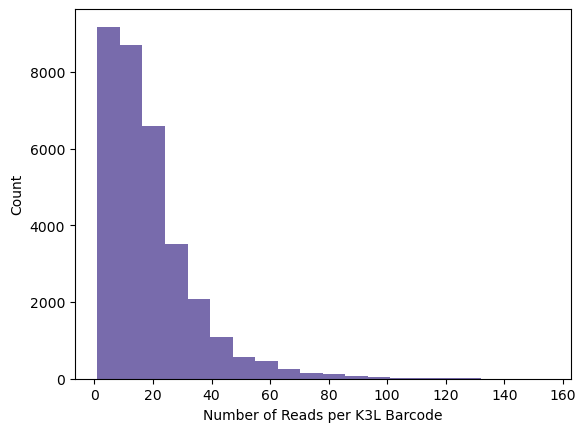

In [12]:
# K3L reads per barcode of designed variants
print('Mean reads per barcode:', df.query('designed_variant')['variant_call_support'].mean())
ax = df.query('designed_variant')['variant_call_support'].plot.hist(bins=20, color='#786bac')
ax.set_xlabel(f'Number of Reads per {protein} Barcode')
ax.set_ylabel('Count')
fig = ax.get_figure()

img_path = f'../img/pacbio_{protein}-barcodes/{protein}_reads-per-variant'
fig.savefig(f'{img_path}.png')
fig.savefig(f'{img_path}.svg')
print('Saved image to:', img_path)

In [52]:
df.query('n_aa_substitutions > 1').groupby('L2V_bool')['variant_call_support'].sum()

L2V_bool
False    32000
True     67655
Name: variant_call_support, dtype: int64

In [53]:
67655/(67655+32000)

0.6788921780141488

<Axes: ylabel='variant_call_support'>

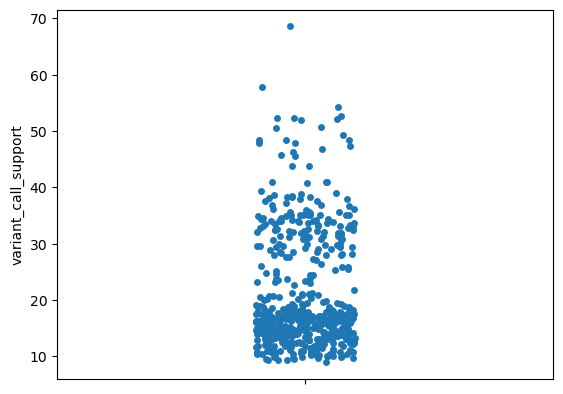

In [29]:
sns.stripplot(data=df.query('designed_variant').groupby('infered_aa_substitutions')['variant_call_support'].mean().reset_index(), y='variant_call_support')

In [44]:
df.query('n_aa_substitutions > 1')['variant_call_support'].sum()

99655

In [38]:
df['variant_call_support'].sum()

650308

In [48]:
df[(df['designed_variant']) & (['L2V_bool'])]['variant_call_support'].sum()

606828

In [49]:
606828/650308

0.9331393739581859

In [125]:
sns.swarmplot(data=df.query('designed_variant'), y='variant_call_support', alpha=.5)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x12e090a60> (for post_execute):


KeyboardInterrupt: 

In [120]:
len(design_set)

527

In [93]:
# 527 intended variants, looks like all variants are there minus 4 synonymous changes
full_pacbio_set = set(df.query('designed_variant')['aa_substitutions'].unique())
l2v_set = set([i.split(' ')[-1] for i in list(full_pacbio_set.difference(design_set))])

strict_pacbio_set = set(df.query('strict_designed_variant')['aa_substitutions'].unique())
len(strict_pacbio_set.union(l2v_set))

523